<a href="https://colab.research.google.com/github/sanjiblama28/AI/blob/main/week_10(1-2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda. is_available() else "cpu")

In [13]:
image = Image.open('sample_data/dog.jpg')
preprocess = transforms.Compose([ 
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std =[0.229, 0.224, 0.225])])
input_tensor = preprocess(image)
inputs = input_tensor.unsqueeze(0)

In [14]:
model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V1)
model.eval()
model.to(device)
inputs = inputs.to(device)
with torch.no_grad():
  outputs = model(inputs)
probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
_, indices = torch.sort(probabilities, descending=True)
for i in range(0,5):
   print('ImageNet class:', indices[i].item(), ',probability = %4.3f' %probabilities[indices[i]].item())

image.show()

ImageNet class: 207 ,probability = 0.961
ImageNet class: 208 ,probability = 0.027
ImageNet class: 219 ,probability = 0.002
ImageNet class: 222 ,probability = 0.001
ImageNet class: 852 ,probability = 0.001


Text(0.5, 1.0, 'Dog Image Sample')

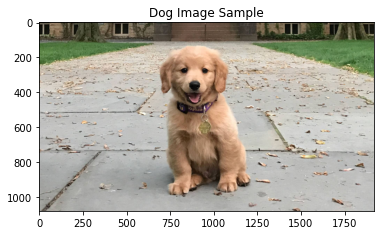

In [16]:
plt.imshow(image)
plt.title('Dog Image Sample')